In [65]:
import numpy as np
import pandas as pd
import photutils as pu
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils.psf import IterativelySubtractedPSFPhotometry

from astropy.io import fits
import matplotlib.pyplot as plt
import glob

## Bias and Overscan

### Step 1

In [2]:
bias_file = glob.glob("wolf1346/bias*.fits")
flat_file = glob.glob("wolf1346/flat*.fits")
data_file = glob.glob("wolf1346/wolf1346*.fits")

### Step 2

In [3]:
print("List of average biases:\n")

bias_data = []

for i in range(len(bias_file)):
    bias_data.append(fits.open(bias_file[i])[0].data)
    print(format(np.average(bias_data[i]), '.3f'))
    

List of average biases:

351.704
351.357
351.653
351.738
351.675
351.712
351.401
351.678
351.694
351.575
351.500


### Step 3

In [4]:
bias_master = sum(bias_data) / len(bias_data)
flat_data = []

for i in range(len(flat_file)):
    flat_data.append(fits.open(flat_file[i])[0].data)
    flat_data[i] = flat_data[i] - bias_master
    
print("Average of master bias:", format(np.average(bias_master), '.3f'))

Average of master bias: 351.477


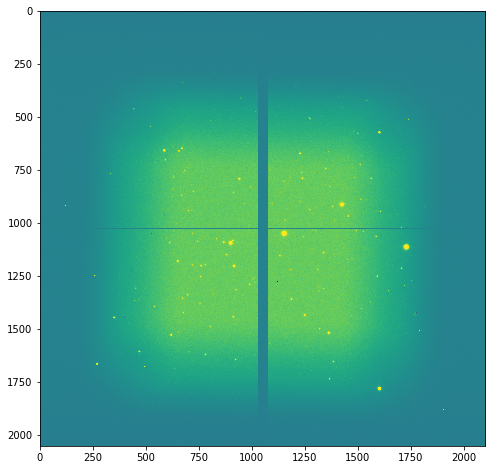

In [6]:
im_data = []

for i in range(len(data_file)):
    im_data.append(fits.open(data_file[i])[0].data)

plt.figure(figsize=(12,8))
plt.imshow(im_data[3] - bias_master, cmap="viridis", clim=(-400, 500));

### Step 4

In [30]:
print('The overscan regions are approximately:\n')
print('Rows: 1020 - 1030')
print('Colums: 1040 - 1090')

The overscan regions are approximately:

Rows: 1020 - 1030
Colums: 1040 - 1090


### Step 5

In [31]:
headers = []
for i in range(0,len(flat_file)-1, 2):
    headers.append(fits.open(flat_file[i])[0].header)
    headers.append(fits.open(flat_file[i+1])[0].header)
    print(headers[i]["FILENAME"], ":", headers[i]["FILTER"], ";", headers[i+1]["FILENAME"], ":", headers[i+1]["FILTER"])


flat.0005.fits : Wash M ; flat.0006.fits : Wash M
flat.0007.fits : Wash M ; flat.0008.fits : Wash M
flat.0009.fits : Wash M ; flat.0010.fits : Wash M
flat.0011.fits : Wash M ; flat.0012.fits : Wash M
flat.0013.fits : Wash M ; flat.0014.fits : Wash M
flat.0015.fits : Wash M ; flat.0016.fits : Wash M
flat.0017.fits : J-C Rc ; flat.0018.fits : J-C Rc
flat.0019.fits : J-C Rc ; flat.0020.fits : J-C Rc
flat.0021.fits : J-C Rc ; flat.0022.fits : J-C Rc
flat.0023.fits : J-C Rc ; flat.0024.fits : J-C Rc
flat.0025.fits : J-C Rc ; flat.0026.fits : J-C Rc
flat.0027.fits : J-C Rc ; flat.0028.fits : J-C Rc
flat.0029.fits : J-C Rc ; flat.0030.fits : J-C Rc
flat.0031.fits : J-C Rc ; flat.0032.fits : J-C Rc
flat.0033.fits : J-C Rc ; flat.0034.fits : J-C Rc
flat.0035.fits : J-C Rc ; flat.0036.fits : J-C Rc
flat.0037.fits : J-C Rc ; flat.0038.fits : J-C Rc
flat.0039.fits : J-C Rc ; flat.0040.fits : J-C Rc


## The Sky

In [32]:
quad_data = fits.open("quadRU.fits")[0].data
stars = pu.DAOStarFinder(200, 5).find_stars(quad_data)

data = [[stars['xcentroid'][i], stars['ycentroid'][i]] for i in range(len(stars))]


### Step 6

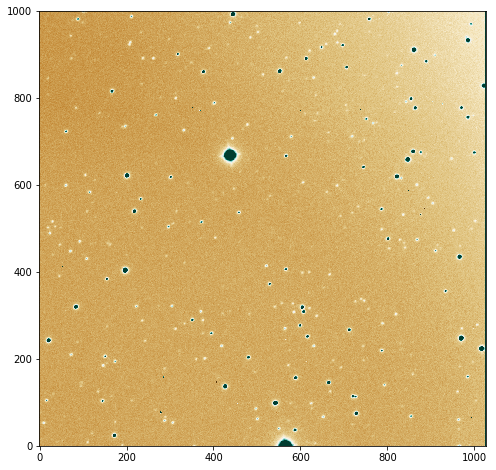

In [33]:
plt.figure(figsize=(12,8))
plt.ylim(0,1000)
plt.imshow(quad_data, cmap='BrBG', clim=(0, 1000))

In [34]:
print('Number of stars found:', len(stars))

Number of stars found: 191


In [40]:
aperture = pu.CircularAperture(data, r=5.)
table = aperture_photometry(quad_data, aperture)
table

id,xcenter,ycenter,aperture_sum
,pix,pix,
int32,float64,float64,float64
1,562.393817657395,1.5286301374981948,2750141.0423550066
2,191.03563617814692,2.275823222744332,20238.627910265932
3,564.8475289457816,3.0916409934350804,3253312.737972618
4,172.86894581000482,24.836034311574362,102650.2859672494
5,587.5980897548266,36.730226038251864,66506.14602294621
6,550.5983097882797,40.478259818229155,33073.03928852662
7,10.46421469327103,53.231741080564206,27521.93842945824
8,306.8731201530581,53.94316956575186,28889.394993526468


### Step 8/9

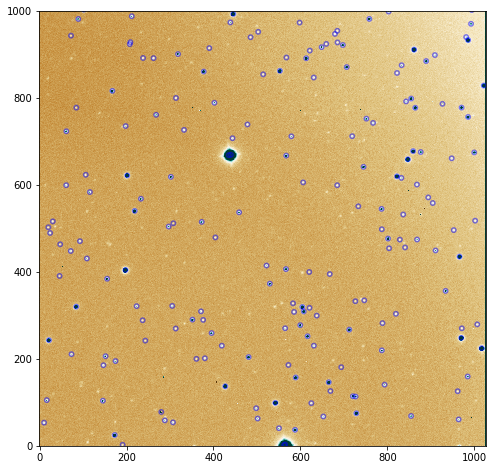

In [44]:
plt.figure(figsize=(12,8))
plt.ylim(0,1000)
plt.imshow(quad_data, cmap='BrBG', clim=(0, 1000))
aperture.plot(color='blue', lw= 1.5, alpha=0.5)

### Step 11

In [49]:
ann = CircularAnnulus(data, r_in = 6, r_out = 8)
apers = [aperture, ann]
pho_table = aperture_photometry(quad_data, apers)
pho_table

id,xcenter,ycenter,aperture_sum_0,aperture_sum_1
,pix,pix,,
int32,float64,float64,float64,float64
1,562.393817657395,1.5286301374981948,2750141.0423550066,634328.4080194957
2,191.03563617814692,2.275823222744332,20238.627910265932,14516.180431241244
3,564.8475289457816,3.0916409934350804,3253312.737972618,462884.5858793913
4,172.86894581000482,24.836034311574362,102650.2859672494,27516.08827650526
5,587.5980897548266,36.730226038251864,66506.14602294621,27298.48968592452
6,550.5983097882797,40.478259818229155,33073.03928852662,25252.43446934133
7,10.46421469327103,53.231741080564206,27521.93842945824,23135.370817191513
8,306.8731201530581,53.94316956575186,28889.394993526468,23618.539194185956


In [59]:
bkg_avg = pho_table['aperture_sum_1'] / ann.area()
bkg_sum = bkg_avg * aperture.area()

total = pho_table['aperture_sum_0'] - bkg_sum

pho_table['residual_aperture_sum'] = total

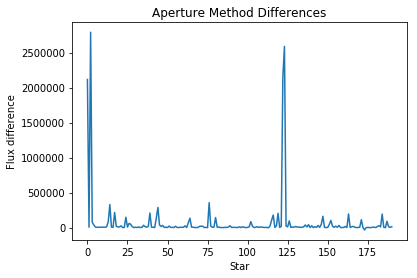

In [63]:
plt.title('Aperture Method Differences')
plt.ylabel('Flux difference')
plt.xlabel('Star')

plt.plot(pho_table['aperture_sum_0'] - pho_table['aperture_sum_1']);

It appears we have 3 major groups of stars here. The first consists of 3 stars where the flux difference is very large. These are on the or of 10^6. The next appear to be sitting somewhere between 10^4 and 10^5. The last group is the constant line we have near zero. These three groups show how both methods treat stars of different brightnesses.

### Step 12

In [67]:
#my_photometry = IterativelySubtractedPSFPhotometry(data, data, bkg_avg, table, niters=3, fitshape=(7,7))

#photometry_results = my_photometry(image=my_image)
#residual_image = my_photometry.get_residual_image()

I could not get the PSF fitting to work properly.

### Step 13

Only one filter